### template:

1. import libraries
2. dataset load
3. data preparation / preprocess
4. model create
5. train the model
6. predict (with test data)
7. evaluate the model 
8. plot

Accuracy:  0.8020833333333334
Classification report: 
               precision    recall  f1-score   support

           0       0.82      0.91      0.86       130
           1       0.75      0.58      0.65        62

    accuracy                           0.80       192
   macro avg       0.78      0.74      0.76       192
weighted avg       0.80      0.80      0.79       192

Confusion matrix: 
 [[118  12]
 [ 26  36]]


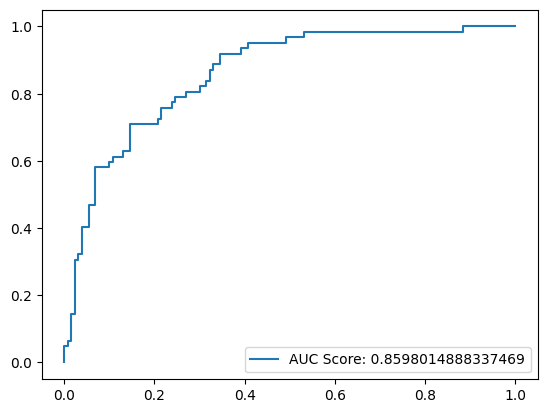

In [9]:
# import libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# dataset load
data = pd.read_csv("datasets/diabetes2.csv")

# data prepare
X = data.drop('Outcome', axis='columns')
y = data['Outcome'] # target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
data.describe()

# Data preprocessing
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# model create
model = LogisticRegression(C=100,max_iter=1000) # C = 0,10,100,1000 -> Regularization

# model train
model.fit(X_train, y_train)

# model predict
y_pred = model.predict(X_test)

# evaluate
acc = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
matrix = confusion_matrix(y_test, y_pred)

print("Accuracy: ", acc)
print("Classification report: \n", report)
print("Confusion matrix: \n", matrix)

# plot
y_pred_proba = model.predict_proba(X_test)[::, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)

plt.plot(fpr, tpr, label=f"AUC Score: {auc}")
plt.legend()
plt.show()

1. Regularization
2. Data Preprocessing

So far:
- AUC Score: 0.8593052109181142
   - C = 10: 0.8595
   - C = 100: 0.898
      - MinMaxScaler: 0.85955
      - StandardScaler: 0.8598
- Accuracy: 0.796875